In [1]:
# Import the dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

# Import the requests library.

import requests

# Import the API key.

from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34ddd8ec0dfea1c6836a01c627e5e25


In [3]:
# Import the time library and the datetime module from the datetime library

import time

from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs



In [5]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    
    print(coordinate[0], coordinate[1])

-73.46240850422222 160.9418744416078
-14.288458940141695 -97.61449683216908
32.29888309161791 -95.96117851009727
31.1928453404406 150.72293860775278
71.8344437667516 -24.284992847399906
-75.99187571133076 79.28025058374192
67.95789998453671 -121.0570989613248
-14.367768837535351 89.24484301775578
-66.84244086876515 76.91602713127742
13.588694170416375 31.698615838999388
22.21046464264711 51.97453735960639
-17.609622359070016 -61.57406070318622
89.88192864950233 146.84037311858037
72.34980818882099 -115.17056576095871
51.62399074449536 20.888974111857806
-52.95951727350869 155.4747397907267
-86.9710842153389 -165.3614157088832
18.86640110197827 -151.4471815329638
79.28648950472314 60.01845054053723
-46.60740199351255 -115.13919921763481
47.00613149021572 176.84071366759764
29.551566768505083 -163.75602455549165
3.118945890154592 -121.67708021545732
47.862757614616584 158.0878962570916
-85.27662896081894 -74.16629444793546
-46.99063152298895 -14.74445601831107
41.101114099905516 66.96010

In [7]:
# Use the citipy module to determine city based on latitude and longitude.

from citipy import citipy

In [8]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)

606

In [9]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")

# Create counters.

record_count = 1

set_count = 1

# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)

    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          
                          "Lat": city_lat,
                          
                          "Lng": city_lng,
                          
                          "Max Temp": city_max_temp,
                          
                          "Humidity": city_humidity,
                          
                          "Cloudiness": city_clouds,
                          
                          "Wind Speed": city_wind,
                          
                          "Country": city_country,
                          
                          "Date": city_date})

# If an error is experienced, skip the city.

    except:
        
        print("City not found. Skipping...")
        
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")

print("Data Retrieval Complete      ")

print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | athens
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | norman wells
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | tandalti
Processing Record 11 of Set 1 | abu samrah
Processing Record 12 of Set 1 | santa rosa
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | grojec
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | amderma
City not found. Skipping...
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | nikolskoye
Processing Recor

Processing Record 39 of Set 4 | olafsvik
Processing Record 40 of Set 4 | carnarvon
Processing Record 41 of Set 4 | peniche
Processing Record 42 of Set 4 | galesong
Processing Record 43 of Set 4 | fairbanks
Processing Record 44 of Set 4 | ukiah
Processing Record 45 of Set 4 | camacha
Processing Record 46 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 4 | panama city
Processing Record 48 of Set 4 | santa fe
Processing Record 49 of Set 4 | thompson
Processing Record 50 of Set 4 | akyab
Processing Record 1 of Set 5 | ipixuna
Processing Record 2 of Set 5 | saint-joseph
Processing Record 3 of Set 5 | lasa
Processing Record 4 of Set 5 | celestun
Processing Record 5 of Set 5 | atherton
Processing Record 6 of Set 5 | zaysan
Processing Record 7 of Set 5 | staryy nadym
Processing Record 8 of Set 5 | castro
Processing Record 9 of Set 5 | saskylakh
Processing Record 10 of Set 5 | bandundu
Processing Record 11 of Set 5 | miri
Processing Record 12 of Set 5 |

Processing Record 25 of Set 8 | alofi
Processing Record 26 of Set 8 | sheridan
Processing Record 27 of Set 8 | asosa
Processing Record 28 of Set 8 | nambucca heads
Processing Record 29 of Set 8 | san carlos de bariloche
Processing Record 30 of Set 8 | labuan
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | san jose
Processing Record 33 of Set 8 | kardailovo
Processing Record 34 of Set 8 | mogadishu
Processing Record 35 of Set 8 | halalo
City not found. Skipping...
Processing Record 36 of Set 8 | khani
Processing Record 37 of Set 8 | bajil
Processing Record 38 of Set 8 | krasnogorodsk
Processing Record 39 of Set 8 | natal
Processing Record 40 of Set 8 | cloquet
Processing Record 41 of Set 8 | port hardy
Processing Record 42 of Set 8 | sangar
Processing Record 43 of Set 8 | lorengau
Processing Record 44 of Set 8 | balkanabat
Processing Record 45 of Set 8 | tazovskiy
Processing Record 46 of Set 8 | kyra
Processing Record 47 of Set 8 | andenes
Processing

Processing Record 16 of Set 12 | adelaide
Processing Record 17 of Set 12 | porto santo
Processing Record 18 of Set 12 | oussouye
Processing Record 19 of Set 12 | rundu
Processing Record 20 of Set 12 | benicarlo
Processing Record 21 of Set 12 | tiruvallur
Processing Record 22 of Set 12 | kinsale
Processing Record 23 of Set 12 | aksarka
Processing Record 24 of Set 12 | porto novo
Processing Record 25 of Set 12 | narsaq
Processing Record 26 of Set 12 | brest
Processing Record 27 of Set 12 | cherepet
Processing Record 28 of Set 12 | ambon
Processing Record 29 of Set 12 | berlevag
Processing Record 30 of Set 12 | nishihara
Processing Record 31 of Set 12 | noumea
Processing Record 32 of Set 12 | biak
Processing Record 33 of Set 12 | lazurne
Processing Record 34 of Set 12 | kaeo
Processing Record 35 of Set 12 | elizabeth city
Processing Record 36 of Set 12 | rocha
Processing Record 37 of Set 12 | mount gambier
Processing Record 38 of Set 12 | zheleznodorozhnyy
Processing Record 39 of Set 12 |

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,61.41,69,27,3.36,NZ,2023-01-01 23:32:19
1,Puerto Ayora,-0.7393,-90.3518,74.55,92,33,3.00,EC,2023-01-01 23:32:19
2,Athens,37.9795,23.7162,53.33,79,20,6.91,GR,2023-01-01 23:30:26
3,Hasaki,35.7333,140.8333,41.22,49,11,13.47,JP,2023-01-01 23:32:19
4,Busselton,-33.6500,115.3333,63.25,56,0,14.34,AU,2023-01-01 23:32:20
5,Norman Wells,65.2820,-126.8329,-0.36,85,75,6.91,CA,2023-01-01 23:32:20
6,Bengkulu,-3.8004,102.2655,74.41,89,100,4.32,ID,2023-01-01 23:32:21
7,Saint-Philippe,-21.3585,55.7679,74.79,78,83,1.39,RE,2023-01-01 23:32:21
8,Tandalti,13.0167,31.8667,67.68,19,2,15.12,SD,2023-01-01 23:32:21
9,Abu Samrah,35.3029,37.1841,44.83,67,100,3.58,SY,2023-01-01 23:32:22


In [12]:
#reorganize columns to City, Country, Date Lat, Lng, max temp, humidity, cloudiness and wind speed

new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df= city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2023-01-01 23:32:19,-46.6000,168.3333,61.41,69,27,3.36
1,Puerto Ayora,EC,2023-01-01 23:32:19,-0.7393,-90.3518,74.55,92,33,3.00
2,Athens,GR,2023-01-01 23:30:26,37.9795,23.7162,53.33,79,20,6.91
3,Hasaki,JP,2023-01-01 23:32:19,35.7333,140.8333,41.22,49,11,13.47
4,Busselton,AU,2023-01-01 23:32:20,-33.6500,115.3333,63.25,56,0,14.34
...,...,...,...,...,...,...,...,...,...
554,Agadez,NE,2023-01-01 23:47:22,19.7500,10.2500,53.92,27,0,11.01
555,Mitsamiouli,KM,2023-01-01 23:47:23,-11.3847,43.2844,80.01,77,77,5.19
556,Tual,ID,2023-01-01 23:47:23,-5.6667,132.7500,83.80,75,100,15.17
557,Shache,CN,2023-01-01 23:47:24,38.4167,77.2406,18.54,41,0,3.11


In [13]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")


In [14]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

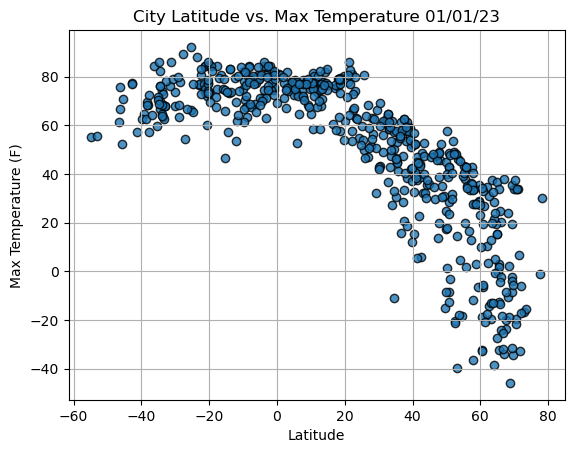

In [15]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            
            max_temps,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

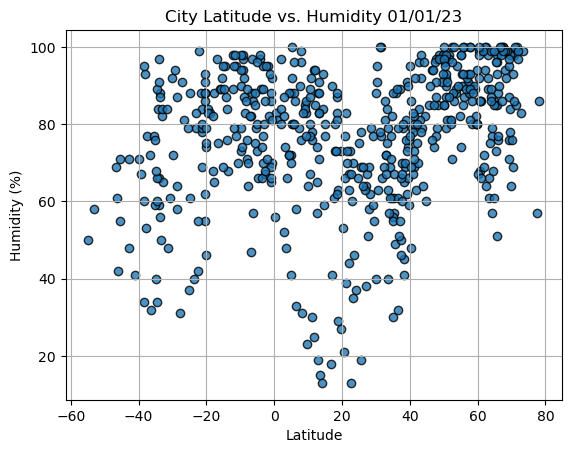

In [16]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            
            humidity,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

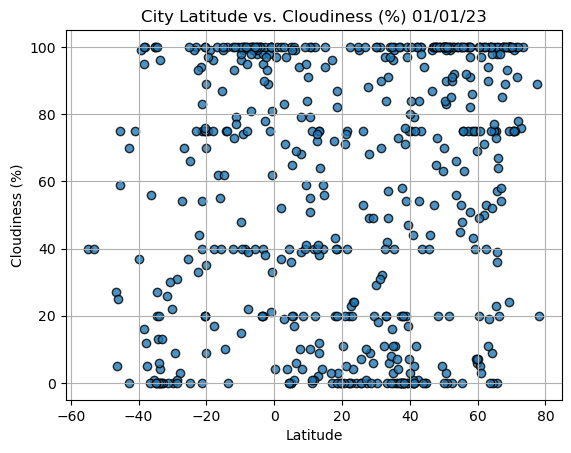

In [17]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            
            cloudiness,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

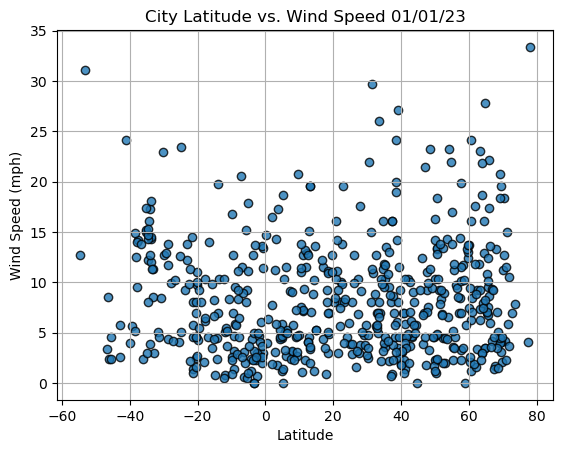

In [18]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            
            wind_speed,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()